In [1]:
#pip install --upgrade matplotlib numpy

In [2]:
### 1. Import necessary libraries.

import pandas as pd
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# import seaborn library for an advance visualization
import seaborn as sns 

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# import random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig


# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter("ignore", np.ComplexWarning)

C:\Users\anwar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# set the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
import os
os.getcwd()
os.chdir("D:\GREAT LEARNING PART B\Data Engineering\PROJECT")

In [5]:
## 2. Display a sample of five rows of the data frame.

sales = pd.read_csv(r"sales_data_sample.csv",encoding_errors ='replace')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
### 3. Check the shape of the data (number of rows and columns). 
sales.shape

(2823, 25)

In [7]:
sales_copy = sales.copy()
sales_copy.shape

(2823, 25)

In [8]:
## Check the general information about the dataframe using the .info() method.

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
# 4. Check the percentage of missing values in each column of the dataframe.

total = sales.isnull().sum().sort_values(ascending=False)

percent = (sales.isnull().sum()*100/sales.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
ADDRESSLINE2,2521,89.302161
STATE,1486,52.639036
TERRITORY,1074,38.044633
POSTALCODE,76,2.692171
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


In [10]:
# 5. Check if there are any duplicate rows

In [11]:
duplicates = sales.duplicated().sum()

print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [12]:
## 6. Write a function that will impute missing values of the columns “STATE”,
# “POSTALCODE”,“TERRITORY” with its most occurring label.

In [13]:
def impute_most_frequent(sales, columns):
    for column in columns:
        most_frequent_label = sales[column].mode().values[0]
        sales[column].fillna(most_frequent_label, inplace=True)

columns_to_impute = ['STATE','POSTALCODE','TERRITORY']
impute_most_frequent(sales, columns_to_impute)

In [14]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


In [15]:
sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE                  0
POSTALCODE             0
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [16]:
## 7. Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.

In [17]:
sales = sales.drop(["ADDRESSLINE2","ORDERDATE","PHONE"],axis=1)

In [18]:
sales.shape

(2823, 22)

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  STATE             2823 non-null   object 
 16  POSTALCODE        2823 non-null   object 


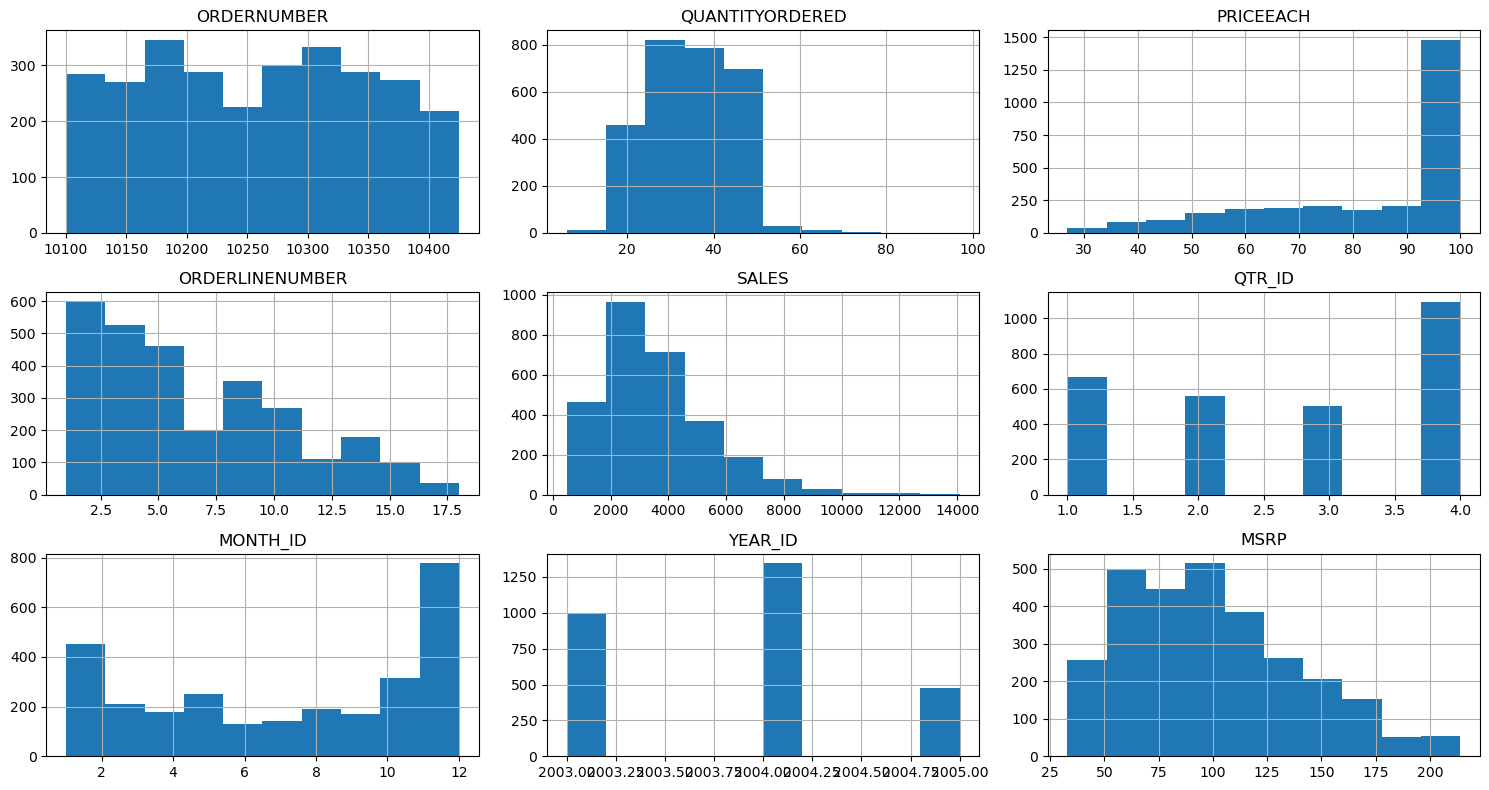

In [20]:
# Visualize the data

plt.rcParams['figure.figsize'] = [15,8]
sales.hist()
plt.tight_layout()
plt.show()

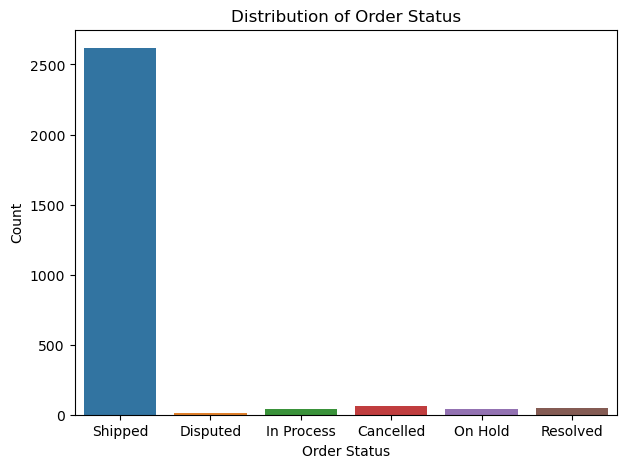

In [21]:
# Find the Distribution of Dependent Variable Categories
plt.rcParams['figure.figsize'] = [7,5]
sns.countplot(x='STATUS', data=sales)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

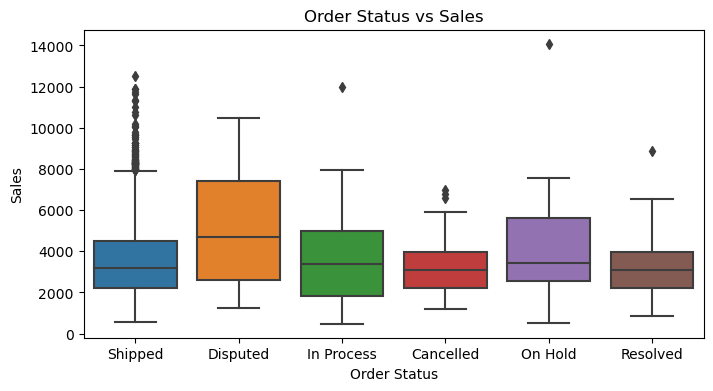

In [22]:
# Bivariate Analysis of all variables
plt.rcParams['figure.figsize'] = [8,4]
sns.boxplot(x='STATUS', y='SALES', data=sales)
plt.title('Order Status vs Sales')
plt.xlabel('Order Status')
plt.ylabel('Sales')
plt.show()

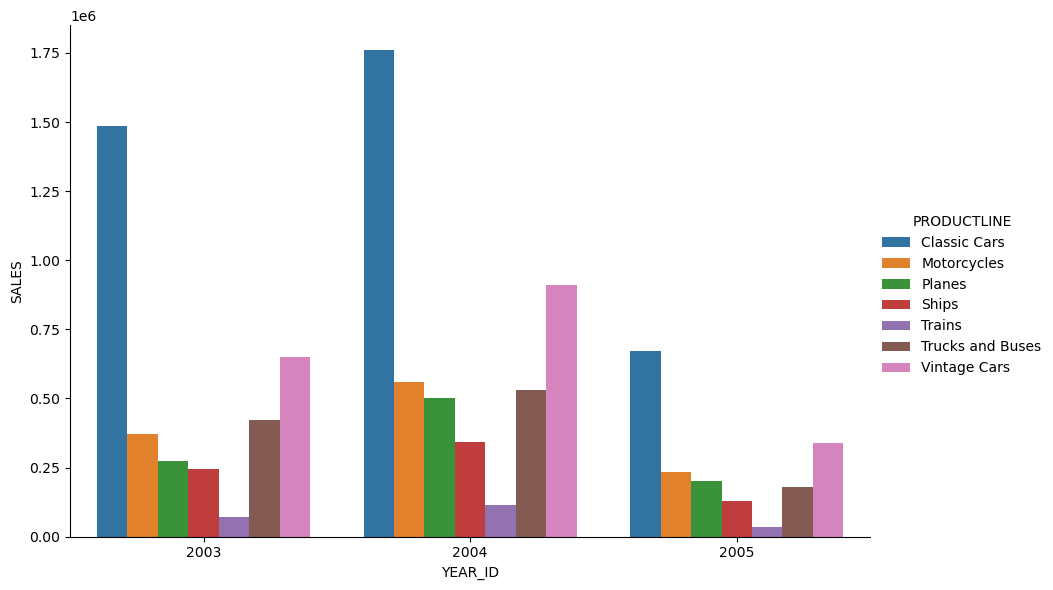

In [23]:
# Group by the 'YEAR_ID' and 'PRODUCTLINE' columns and calculate the sum of 'SALES' for each group
sales_by_year_and_productline = sales.groupby(['YEAR_ID','PRODUCTLINE'])[['SALES']].sum().reset_index()

# Use the 'catplot' function from the seaborn library to create a categorical plot
sns.catplot(x='YEAR_ID', y='SALES', hue='PRODUCTLINE', data=sales_by_year_and_productline, kind='bar', height=6, aspect=1.5);

<function matplotlib.pyplot.show(close=None, block=None)>

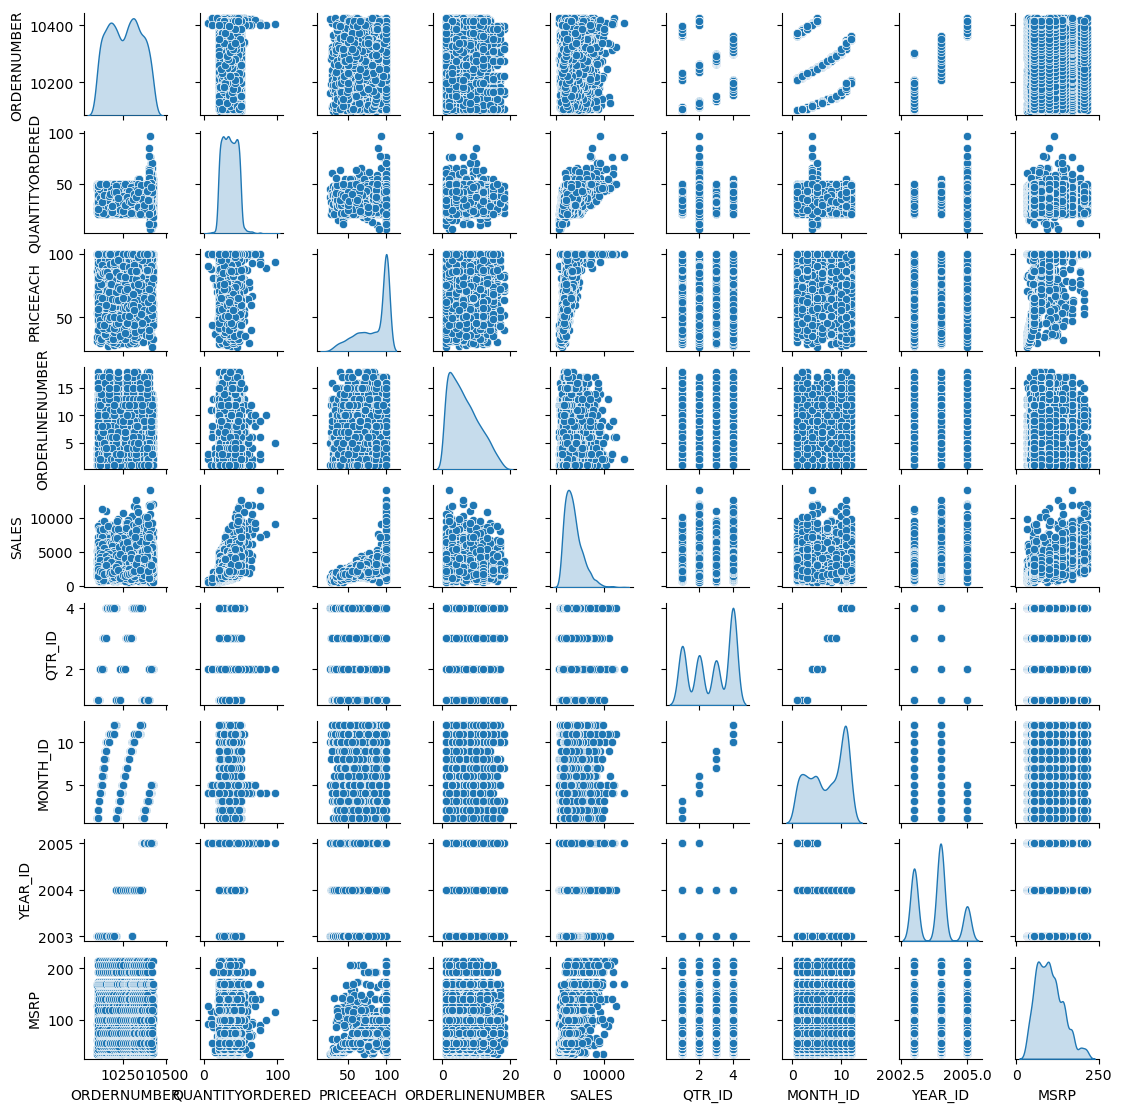

In [24]:
sns.pairplot(sales, diag_kind='kde', height = 1.25) 
plt.show

In [25]:
# Correlation Matrix
describe = sales.corr()
describe.style.background_gradient(cmap = "Reds")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


In [26]:
sales["STATUS"].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [27]:
sales['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [28]:
words = ['Disputed','In Process','Cancelled','On Hold','Resolved']

sales["STATUS"] = sales["STATUS"].replace(words,0)

sales["STATUS"] = sales["STATUS"].replace("Shipped",1)

In [29]:
sales['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

In [30]:
# Assign 'STATUS' column to the label variable
status = sales['STATUS']

# Drop 'STATUS' column from the original DataFrame
sales = sales.drop('STATUS', axis=1) 

In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   QTR_ID            2823 non-null   int64  
 6   MONTH_ID          2823 non-null   int64  
 7   YEAR_ID           2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   object 
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   object 
 11  CUSTOMERNAME      2823 non-null   object 
 12  ADDRESSLINE1      2823 non-null   object 
 13  CITY              2823 non-null   object 
 14  STATE             2823 non-null   object 
 15  POSTALCODE        2823 non-null   object 
 16  COUNTRY           2823 non-null   object 


In [32]:
# Convert the original DataFrame to dummy coded data
sales_dummy = pd.get_dummies(sales)

In [33]:
# display data with dummy variables
sales_dummy.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,...,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,2871.00,1,2,2003,95,0,...,0,0,0,0,0,0,0,0,0,1
1,10121,34,81.35,5,2765.90,2,5,2003,95,0,...,0,0,0,0,0,0,0,0,0,1
2,10134,41,94.74,2,3884.34,3,7,2003,95,0,...,0,0,0,0,0,0,0,0,1,0
3,10145,45,83.26,6,3746.70,3,8,2003,95,0,...,0,0,0,0,0,0,0,0,1,0
4,10159,49,100.00,14,5205.27,4,10,2003,95,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
## 10. Use StandardScaler to scale the data.

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_dummy)
scaled_data

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -0.24267205,
         1.01967636, -0.9121005 ]])

In [36]:
# create a dataframe of scaled data
df_std = pd.DataFrame(scaled_data)

In [37]:
# Using the 'PCA()' from the sklearn library to reduce the number of features 
pca = PCA(n_components = 2, random_state = 10)  
df_pca_data = pd.DataFrame(pca.fit_transform(df_std), columns = ['PC1', 'PC2'])

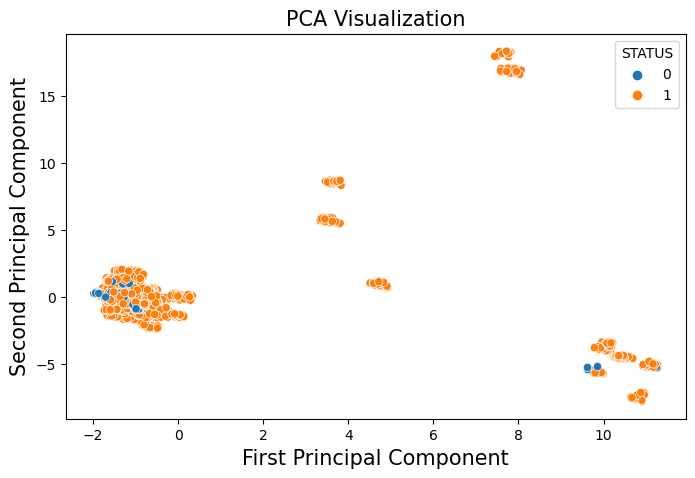

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_data, hue = status)
plt.title('PCA Visualization', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)
plt.show()

In [39]:
# 3. Intuition about the scatter plot
# The scatter plot shows the distribution of data points in a 2-dimensional space
# based on the first two principal components. The color coding represents the
# labels (shipped or canceled). It helps visualize if there is any separation or
# clustering of the data points based on their labels.

In [40]:
# 1. Fit the PCA model on the data and plot explained variance

pca_data = pca.fit_transform(df_std)
df_pca_data = pd.DataFrame(pca_data, columns = ['PC1', 'PC2'])
df_pca_data

,PC1,PC2
0,-0.884263,-0.560361
1,-1.064412,0.347537
2,-1.050108,0.141227
3,-1.280154,-0.488864
4,-1.366455,-0.317167
...,...,...
2818,-1.594559,-0.220117
2819,-1.640883,1.168321
2820,-1.705959,-0.023996
2821,-1.260754,0.298366


In [41]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [42]:
# Calculate the variance explained by principle components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Cumulative Explained Variance:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.01562142 0.01368211]
Cumulative Explained Variance: 2.93


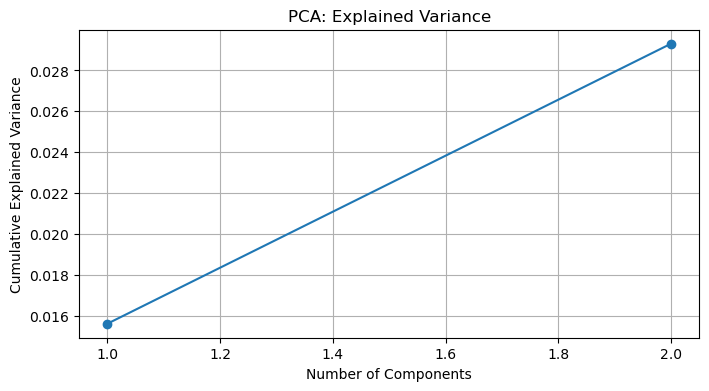

In [43]:
# 1. Plotting a graph between n_components and cumulative explained variance.
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance")
plt.grid(True)
plt.show()

In [44]:
cov_matrix = np.cov(df_std.T)
print('Covariance Matrix \n', cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('\n Eigen Vectors \n', eigenvectors)
print('\n Eigen Values \n', eigenvalues)

Covariance Matrix 
 [[ 1.00035436  0.06556638 -0.00293558 ...  0.03253303 -0.00786511
  -0.00707781]
 [ 0.06556638  1.00035436  0.005566   ...  0.30233777  0.28751923
  -0.42784622]
 [-0.00293558  0.005566    1.00035436 ...  0.19425996  0.56921326
  -0.66093218]
 ...
 [ 0.03253303  0.30233777  0.19425996 ...  1.00035436 -0.23807362
  -0.22141973]
 [-0.00786511  0.28751923  0.56921326 ... -0.23807362  1.00035436
  -0.89481697]
 [-0.00707781 -0.42784622 -0.66093218 ... -0.22141973 -0.89481697
   1.00035436]]

 Eigen Vectors 
 [[-4.75623841e-03+0.j  5.91466785e-03+0.j -2.60851257e-03+0.j ...
  -3.95044828e-16+0.j -1.20347979e-16+0.j  6.61402399e-16+0.j]
 [-1.35779533e-02+0.j -1.03535215e-02+0.j  4.85769970e-04+0.j ...
  -1.18675286e-16+0.j -1.74985052e-16+0.j  9.86093819e-17+0.j]
 [-5.91527151e-03+0.j  3.03215733e-03+0.j -1.15597007e-02+0.j ...
  -1.18117063e-16+0.j -2.34513941e-16+0.j  1.17607377e-16+0.j]
 ...
 [-9.41147807e-03+0.j -3.61339351e-03+0.j -2.79327607e-03+0.j ...
   5.5539650

In [45]:
tot_sum = sum(eigenvalues)
var_explained = [(i / tot_sum) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)  
cum_var_exp

array([0.01565558+0.00000000e+00j, 0.0294527 +0.00000000e+00j,
       0.04261418+0.00000000e+00j, 0.05517801+0.00000000e+00j,
       0.06714969+0.00000000e+00j, 0.07893697+0.00000000e+00j,
       0.09056909+0.00000000e+00j, 0.10192784+0.00000000e+00j,
       0.11325561+0.00000000e+00j, 0.12453407+0.00000000e+00j,
       0.13573141+0.00000000e+00j, 0.14686992+0.00000000e+00j,
       0.15798554+0.00000000e+00j, 0.1690705 +0.00000000e+00j,
       0.18010066+0.00000000e+00j, 0.19112042+0.00000000e+00j,
       0.20212325+0.00000000e+00j, 0.21308259+0.00000000e+00j,
       0.22398292+0.00000000e+00j, 0.2348278 +0.00000000e+00j,
       0.24558799+0.00000000e+00j, 0.25617092+0.00000000e+00j,
       0.26671765+0.00000000e+00j, 0.27707012+0.00000000e+00j,
       0.28740902+0.00000000e+00j, 0.29756169+0.00000000e+00j,
       0.30768202+0.00000000e+00j, 0.31767405+0.00000000e+00j,
       0.32756647+0.00000000e+00j, 0.33741282+0.00000000e+00j,
       0.3471421 +0.00000000e+00j, 0.35682918+0.0000000

In [46]:
# 2. In how many components we are getting approximately 90% of explained Variance

# Compute the cumulative sum of the explained variance ratio

explained_variance = np.cumsum(pca.explained_variance_ratio_)

explained_variance

array([0.01562142, 0.02930353])

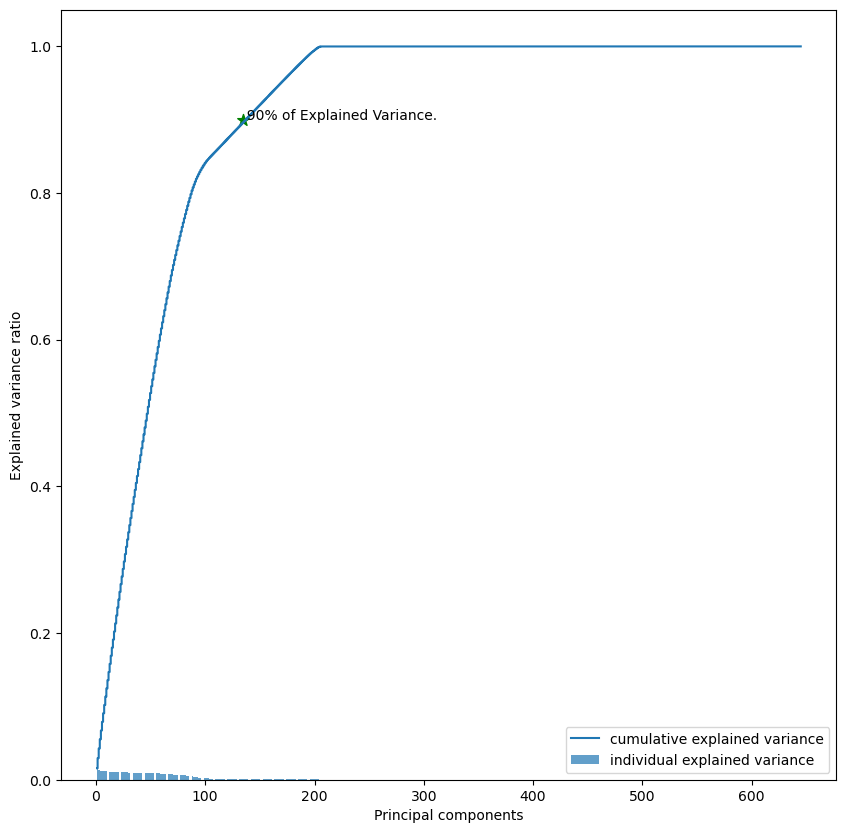

In [47]:
plt.figure(figsize=(10, 10))
plt.bar(range(1,round(tot_sum.real + 1)), var_explained, alpha=0.7, align='center', label='individual explained variance')
plt.step(range(1,round(tot_sum.real + 1)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.scatter(135, 0.9, s=75, c ="green", linewidths = 1, marker ="*")
plt.annotate("  90% of Explained Variance.", (130, 0.9))
plt.show()

In [48]:
# Find the number of components that explain approximately 90% of the variance

n_components_90 = np.argmax(explained_variance >= 0.9) + 1
print("Number of components for approximately 90% explained variance:", n_components_90)

Number of components for approximately 90% explained variance: 1


In [49]:
# 1. Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, status, test_size=0.2, random_state=42)

# check the shape of the train and test sets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (2258, 645)
y_train: (2258,)
X_test: (565, 645)
y_test: (565,)


In [50]:
# Instantiate LDA with required number of components to 
# transform the data on 1-D vector pass 'n_components = 1'
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform the LDA on train data using the 'fit_transform()' 
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform the test data 
X_test_lda = lda.transform(X_test)

In [51]:
X_train_lda.shape, X_test_lda.shape

((2258, 1), (565, 1))

In [52]:
# 3. Train a RandomForest classifier and print accuracy score
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_lda, y_train)

y_pred = rf_classifier.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.9026548672566371
